# Run Examples

**Author:** Alexander Michels

This notebook walks through running the CyberGIS-Compute model composed of the three examples in this guide.

In [1]:
from IPython.display import Image
import os

The GeoJSONs in the `data/` folder is already uploaded as part of the Github repo, so let's get some new data to plot. The commands below make a `new_data` folder and download a dataset of the [Stephen's Kangaroo Rat Range](https://catalog.data.gov/dataset/stephens-kangaroo-rat-range-cwhr-m108-ds1895-25c2b).

In [2]:
!mkdir new_data/
!wget -O new_data/kangarro_rat_range.geojson https://data-cdfw.opendata.arcgis.com/datasets/2331a5a9cf4547faa8b86d73b1af38a0_0.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D

--2022-10-20 19:23:32--  https://data-cdfw.opendata.arcgis.com/datasets/2331a5a9cf4547faa8b86d73b1af38a0_0.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D
Resolving data-cdfw.opendata.arcgis.com (data-cdfw.opendata.arcgis.com)... 3.219.120.199, 34.193.115.202, 44.207.123.71
Connecting to data-cdfw.opendata.arcgis.com (data-cdfw.opendata.arcgis.com)|3.219.120.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘new_data/kangarro_rat_range.geojson’

new_data/kangarro_r     [ <=>                ] 166.25K  --.-KB/s    in 0.04s   

2022-10-20 19:23:33 (3.85 MB/s) - ‘new_data/kangarro_rat_range.geojson’ saved [170244]



Now, we want to connect to our CyberGIS-Compute server with the commands below. Normally we would use "cgjobsup.cigi.illinois.edu", but since this is a toy model, we put it on our test deployment:

In [3]:
from cybergis_compute_client import CyberGISCompute

cybergis = CyberGISCompute(url="cgjobsup-test.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")

Once you pull up the UI by running the cell below, follow these steps:

1. In the "Job Templates" dropdown choose "three-examples."
2. Under the "Input Parameters" section, type your name in the "name" box.
3. Under the "Upload Data" section, choose a folder of data to upload using the "Select" button ("new_data" or "data"). Once you select the folder and click the "Select" button, it should show the path in green next to a "Change" button.
4. Click "Submit Job" at the bottom. 

The UI will switch to the "Your Job Status" tab which gives you updates about your job. Wait for it to finish.

In [4]:
cybergis.show_ui()

With the job complete, go to the "Download Job Results" tab and click the "Download" button to download the full result folder. The download can take a minute or more (depending on the amount of data) and when it is complete, you should see:

```
✅ download success!
please check your data at your root folder under "globus_download_xxxxxxxxxxx"
```

That `globus_download_xxxxxxxxxxx` folder will be in your root directory in the file browser (`~/work` in the terminal) and we can access it with the variable `cybergis.recentDownloadPath`. Let's inspect the outputs:

In [5]:
!ls {cybergis.recentDownloadPath}

0.jpg  slurm_log


The logs for our job are in the result folder under the folder `slurm_log`. Let's see the contents:

In [6]:
!ls {cybergis.recentDownloadPath}/slurm_log/

job.stderr  job.stdout


In [7]:
!cat {cybergis.recentDownloadPath}/slurm_log/job.stderr

ModuleCmd_Use.c(231):ERROR:64: Directory 'gnu/openmpi-4.1.2-gnu-4.8.5' not found
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-sphfow4a because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [8]:
!cat {cybergis.recentDownloadPath}/slurm_log/job.stdout

Hello from example 1!
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
We are going to map 1 geojsons. They are:
  * /job/data/kangarro_rat_range.geojson
Your name is General Kenobi


Now, let's load a map:

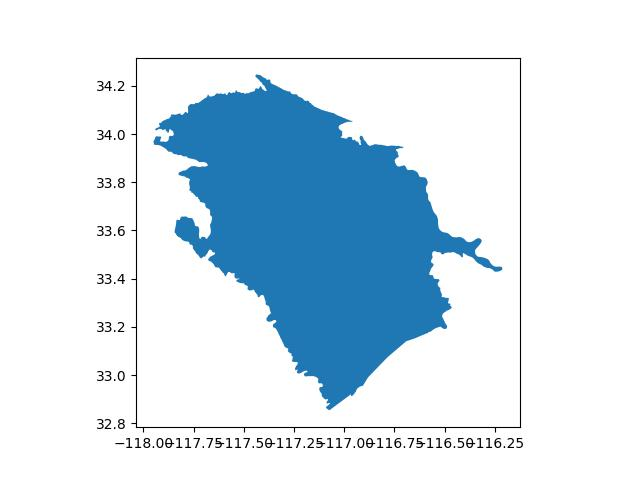

In [9]:
Image(filename=os.path.join(cybergis.recentDownloadPath, "0.jpg"))